pbtest3: This notebook have focus on making a clasification machine learning model

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import ast  # Abstract Syntax Trees - safely parse string list to Python list
from reader import generic_reader
from inflation import read_cpi_by_year, convert_usd

In [2]:
cpi_by_year = read_cpi_by_year("inflation_data/cpiai.csv")

In [3]:
df_movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies.csv")
df_movies['release_date'] = pd.to_datetime(df_movies['release_date']) # Convert release_date into proper datetime objects
df_movies['genre_ids'] = df_movies['genre_ids'].apply(ast.literal_eval) # Turn genre_ids into actual Python list
df_movies['director_person_ids'] = df_movies['director_person_ids'].apply(ast.literal_eval) # Turn director_person_ids into actual Python list

Drop movies which are documentaries, or Animation Films or Short Films

In [4]:
df_movies = df_movies[df_movies["runtime"] >= 60]
print(len(df_movies))
df_movies = df_movies[~df_movies['genre_ids'].apply(lambda genre_id: 16 in genre_id or 99 in genre_id)]
len(df_movies)

24686


20497

In [5]:
# Drop movies where budget is zero
df_movies = df_movies[df_movies['budget'] != 0].copy()
len(df_movies)

6203

In [6]:
# # Drop all movies which does not have excatly one director
# df_movies = df_movies[df_movies['director_person_ids'].apply(lambda x: len(x) == 1)]
# df_movies['director'] = df_movies['director_person_ids'].apply(lambda x: x[0])

In [7]:
columns_to_keep = ['movie_id', 'original_title', 'release_date', 'budget', 'runtime', 'vote_average', 'vote_count', 'director_person_ids', 'genre_ids']
df_movies = df_movies[columns_to_keep].copy()
df_movies

,movie_id,original_title,release_date,budget,runtime,vote_average,vote_count,director_person_ids,genre_ids
11,19214,Passion of Mind,2000-01-07,12000000,105,5.800,42,[96972],"[18, 10749]"
18,17908,My Dog Skip,2000-01-12,6000000,95,6.700,280,[46297],"[35, 18, 10751]"
19,10471,Next Friday,2000-01-12,11000000,98,6.453,609,[52112],[35]
21,10384,Supernova,2000-01-14,90000000,91,4.940,409,"[1723, 62020]","[878, 27, 53]"
26,10213,From Dusk Till Dawn 3: The Hangman's Daughter,2000-01-18,5000000,94,4.900,369,[64190],"[37, 27, 53]"
...,...,...,...,...,...,...,...,...,...
27278,850165,The Iron Claw,2023-12-21,15900000,132,7.540,1088,[527607],"[36, 18]"
27279,1025491,Freud's Last Session,2023-12-22,10000000,109,6.659,145,[1496011],[18]
27281,994108,All of Us Strangers,2023-12-22,5000000,105,7.443,898,[586002],"[10749, 18, 14]"
27285,823452,The Boys in the Boat,2023-12-25,40000000,124,7.233,311,[1461],"[18, 36]"


In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6203 entries, 11 to 27286
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_id             6203 non-null   int64         
 1   original_title       6203 non-null   object        
 2   release_date         6203 non-null   datetime64[ns]
 3   budget               6203 non-null   int64         
 4   runtime              6203 non-null   int64         
 5   vote_average         6203 non-null   float64       
 6   vote_count           6203 non-null   int64         
 7   director_person_ids  6203 non-null   object        
 8   genre_ids            6203 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 484.6+ KB


In [9]:
# Convert budget to 2023 USD
df_movies['budget_2023_usd'] = df_movies.apply(
    lambda row: convert_usd(
        original_amount=row['budget'],
        original_year=row['release_date'].year,
        new_year=2023,
        cpi_by_year=cpi_by_year
    ),
    axis=1
)
df_movies.sort_values(by="budget_2023_usd", ascending=False)

,movie_id,original_title,release_date,budget,runtime,vote_average,vote_count,director_person_ids,genre_ids,budget_2023_usd
25558,507086,Jurassic World Dominion,2022-06-01,583900000,147,6.634,6675,[930707],"[12, 28, 878]",607935300
9515,1865,Pirates of the Caribbean: On Stranger Tides,2011-05-15,379000000,136,6.561,14502,[17633],"[12, 28, 14]",513391695
22477,181812,Star Wars: The Rise of Skywalker,2019-12-18,416000000,142,6.300,10371,[15344],"[12, 28, 878]",495803565
14859,99861,Avengers: Age of Ultron,2015-04-22,365000000,141,7.271,23747,[12891],"[28, 12, 878]",469232494
5365,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,169,7.262,14944,[1704],"[12, 14, 28]",440867221
...,...,...,...,...,...,...,...,...,...,...
7129,123883,Ice Dreams,2009-01-23,1,120,6.400,21,[150971],"[10749, 10770, 18, 10751]",1
21031,571055,Down,2019-02-01,1,82,6.800,246,[120245],"[27, 53, 10770]",1
10638,221161,Devoured,2012-05-05,1,89,5.511,46,[147900],"[53, 27, 18]",1
7606,49970,Junkyard Dog,2009-08-09,1,91,4.100,11,[134878],"[27, 53]",1


In [10]:
# # Define a function for rating_category
# def get_rating_category(vote_average):
#     if vote_average >= 7:
#         return "good";
#     if vote_average >= 5:
#         return "ok";
#     else:
#         return "bad";
    
# Define a function for rating_category
def get_rating_category(vote_average):
    if vote_average >= 6:
        return "good";
    else:
        return "bad";

# Apply the function to df_movies 
df_movies['rating_category'] = df_movies['vote_average'].apply(get_rating_category)
df_movies.sort_values(by="vote_average", ascending=False)

,movie_id,original_title,release_date,budget,runtime,vote_average,vote_count,director_person_ids,genre_ids,budget_2023_usd,rating_category
10614,246895,Complacent,2012-05-01,500000,104,9.400,14,[88039],[18],663566,good
16060,631303,The Devil's Hour,2016-02-02,115000,119,8.900,14,[2411023],"[27, 18, 53]",145998,good
6496,155,The Dark Knight,2008-07-16,185000000,152,8.523,34473,[525],"[18, 28, 80, 53]",261816713,good
14232,157336,Interstellar,2014-11-05,165000000,169,8.500,37950,[525],"[12, 18, 878]",212370429,good
20478,554386,Evanescence: Synthesis Live,2018-10-12,100000,88,8.500,68,[1108767],[10402],121343,good
...,...,...,...,...,...,...,...,...,...,...,...
9192,118332,Total Retribution,2011-02-02,1500000,84,1.800,13,[98360],"[27, 878, 53]",2031893,bad
14272,295884,Saving Christmas,2014-11-14,500000,79,1.800,96,[99388],"[35, 14]",643547,bad
213,203023,Witchcraft XI: Sisters in Blood,2000-05-09,40,90,1.700,11,[98712],[27],71,bad
23882,810511,2025: The World Enslaved by a Virus,2021-01-15,10000,91,1.671,35,"[3025333, 3025334]","[12, 878, 53, 14]",11245,bad


In [11]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os
os.environ["PATH"] += r";C:\Program Files\Graphviz\bin"
import graphviz

# Encode target variable
le_rating = LabelEncoder()
df_movies['rating_encoded'] = le_rating.fit_transform(df_movies['rating_category'])


# Independent variables (X) and dependent variable (y)
X = df_movies[['budget_2023_usd', 'runtime']]
y = df_movies['rating_encoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

# Train model
model = DecisionTreeClassifier(max_depth=3)
# model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=le_rating.classes_))

              precision    recall  f1-score   support

         bad       0.69      0.80      0.74       775
        good       0.76      0.64      0.70       776

    accuracy                           0.72      1551
   macro avg       0.73      0.72      0.72      1551
weighted avg       0.73      0.72      0.72      1551



In [12]:
# draw tree from the trained data by graphviz package
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=['budget_2023_usd', 'runtime'],
                                class_names=le_rating.classes_,  
                                filled=True,
                                rounded=True) 

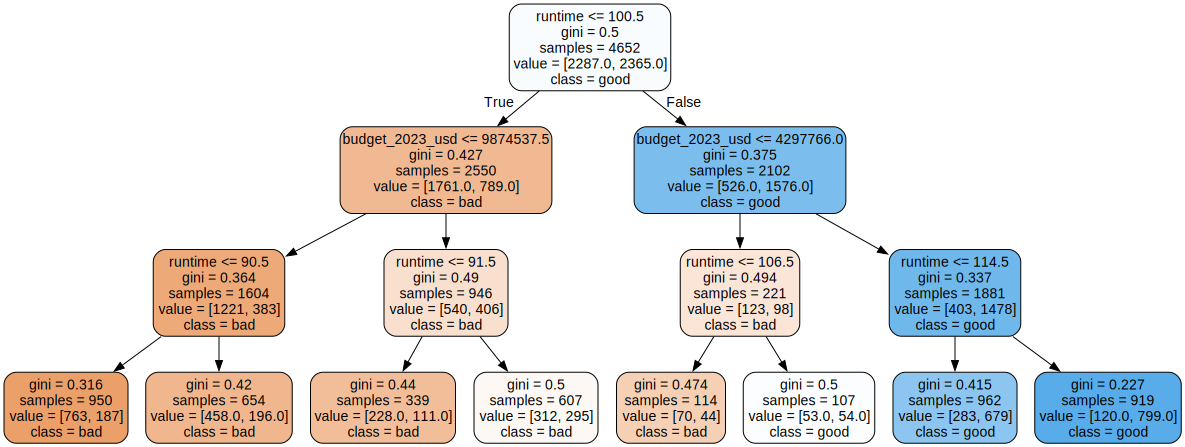

In [13]:
graph = graphviz.Source(dot_data)
graph

Model validation

In [14]:
# # Set the metrics
# scoring = 'accuracy'

In [15]:
# Predict the ratings of the test data
y_testp = model.predict(X_test)
y_testp

array([0, 0, 0, ..., 1, 0, 1])

In [16]:
y_test

22788    0
10904    1
4886     1
14426    1
9966     0
        ..
9097     1
13805    0
26300    1
20546    1
7687     1
Name: rating_encoded, Length: 1551, dtype: int64

In [17]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.7208252740167633


In [18]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[622, 153],
       [280, 496]])

In [19]:
confusion = pd.crosstab(y_test,y_testp)
confusion

col_0,0,1
rating_encoded,,
0,622,153
1,280,496
